<a href="https://colab.research.google.com/github/tomeliud/Prediction-model-of-individuals-that-are-most-likely-to-own-a-bank-account-in-Eastern-Africa/blob/master/Predicting_bank_account_ownership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion in the EAC

## Define the Question

#### Data Analytic Question



> 

1.   Which Individuals are Most Likely to have Bank Account





#### Defining The Metric of Success



> The Metric of Success is by Identifying which Factors influence the owning of a Bank  



#### Understanding the Context





> This involves the Banking Sector and if Individuals in the East African Countries own Bank Accounts  



## Reading The Data

In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Datasets

financial = pd.read_csv('/content/Financial Dataset - 1.csv')
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## Checking the Data

In [ ]:
#Number of records
print('This dataset has {}'.format(financial.shape[0]), 'rows and {}'.format(financial.shape[1]),'columns')

This dataset has 23524 rows and 13 columns


In [ ]:
#Information on the dataset
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Variable desription
variable_description = pd.read_csv('/content/VariableDefinitions.csv')
variable_description

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
# Drop irrelevant columns
financial.drop('uniqueid', 1, inplace=True)

In [ ]:
# Check for missing values
financial.isnull().any()

country                    True
year                      False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [ ]:
financial.isnull().sum()

country                   14
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#Drop Null values
financial.dropna(inplace=True)

In [ ]:
financial.isnull().sum()

country                   0
year                      0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
financial.shape

(23343, 12)

## Tidying Up the Dataset

Box Plot

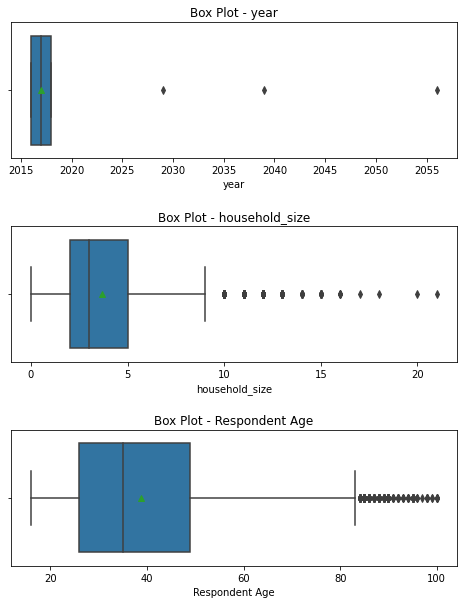

In [ ]:
col_names =['year','household_size','Respondent Age']

fig,ax = plt.subplots(len(col_names), figsize=(8,10))

for i,col_val in enumerate(col_names):
  sns.boxplot(financial[col_val], showmeans=True, ax=ax[i])
  ax[i].set_title('Box Plot - {}'.format(col_val))

plt.subplots_adjust(hspace=0.5)

In [ ]:
# Remove Outliers
# col_names = ['household_size', 'Respondent Age']
q3 = financial.quantile(0.75)
q1 = financial.quantile(0.25)

iqr = q3-q1

fin_outliers = financial[~((financial < (q1 - 1.5 * iqr)) |(financial > (q3 + 1.5 * iqr))).any(axis=1)]
print(fin_outliers.shape)

(22725, 12)


Histograms

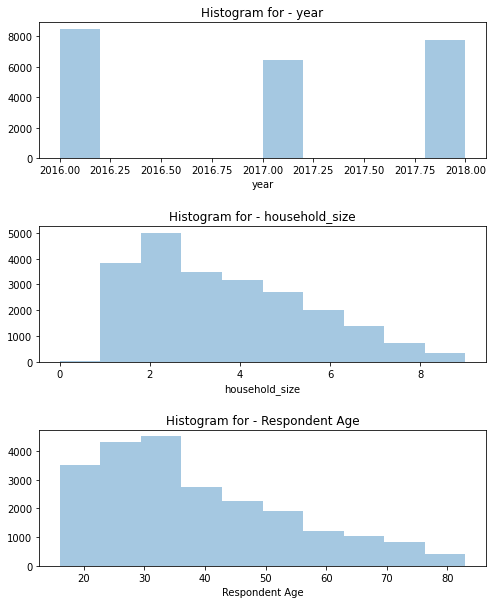

In [ ]:
fig,ax = plt.subplots(len(col_names),figsize=(8,10))

for i,col_val in enumerate(col_names):
  sns.distplot(fin_outliers[col_val], ax=ax[i], kde=False, bins=10)
  ax[i].set_title('Histogram for - {}'.format(col_val))
  ax[i].set_xlabel(col_val)

plt.subplots_adjust(hspace=0.5)

## Univariate Analysis

### Categorical Variables

Text(0.5, 0, 'Has a Bank Account')

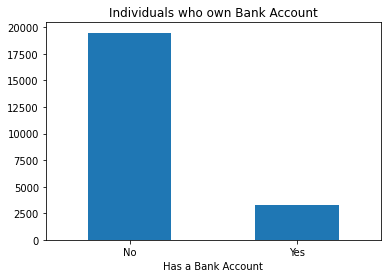

In [ ]:
fin_outliers['Has a Bank account'].value_counts().plot.bar(rot=0)
plt.title('Individuals who own Bank Account')
plt.xlabel('Has a Bank Account')

Text(0.5, 0, 'Type of Location')

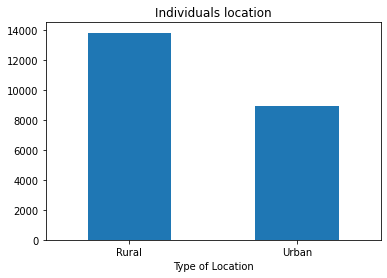

In [ ]:
fin_outliers['Type of Location'].value_counts().plot.bar(rot=0)
plt.title('Individuals location')
plt.xlabel('Type of Location')

Text(0.5, 0, 'Cell Phone Access')

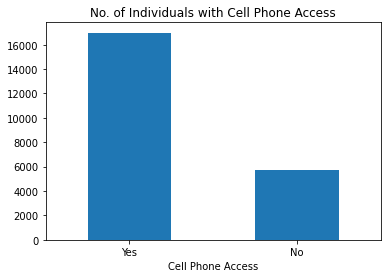

In [ ]:
fin_outliers['Cell Phone Access'].value_counts().plot.bar(rot=0)
plt.title('No. of Individuals with Cell Phone Access')
plt.xlabel('Cell Phone Access')

Text(0.5, 0, 'Gender')

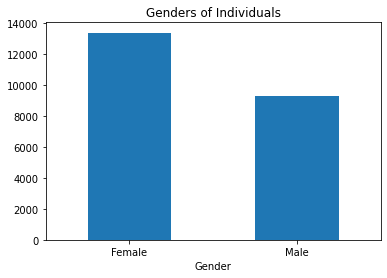

In [ ]:
fin_outliers['gender_of_respondent'].value_counts().plot.bar(rot=0)
plt.title('Genders of Individuals')
plt.xlabel('Gender')

In [ ]:
fin_outliers.replace('6', 'Tertiary education',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Text(0.5, 1.0, 'Levels of Education')

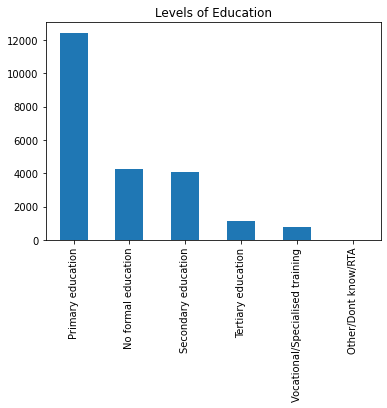

In [ ]:
fin_outliers['Level of Educuation'].value_counts().plot.bar(rot=90)
plt.title('Levels of Education')

Text(0.5, 1.0, 'Marital Status')

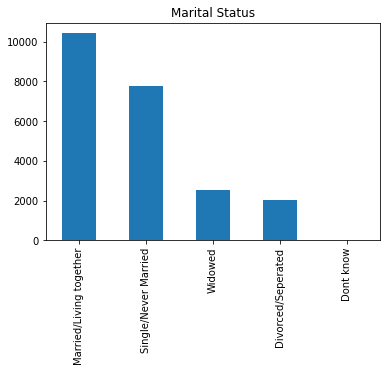

In [ ]:
fin_outliers['marital_status'].value_counts().plot.bar()
plt.title('Marital Status')

Text(0.5, 1.0, 'Relationship with the Head of Household')

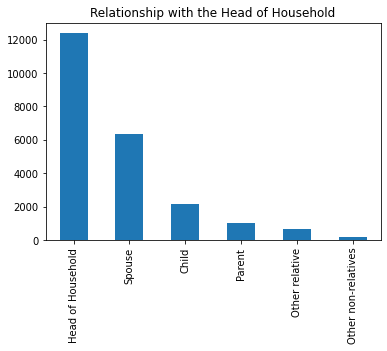

In [ ]:
fin_outliers['The relathip with head'].value_counts().plot.bar()
plt.title('Relationship with the Head of Household')

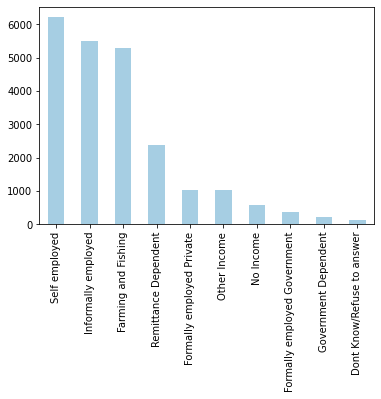

In [ ]:
fin_outliers['Type of Job'].value_counts().plot.bar(colormap='Paired')

### Numerical Variables

Measure of Central Tendency

In [ ]:
print("The mean of Household Size is", financial['household_size'].mean())
print("The mean the Respondent Age is", financial['Respondent Age'].mean())

The mean of Household Size is 3.6886432763569377
The mean the Respondent Age is 38.80550914621085


In [ ]:
print("The median of household size is", financial['household_size'].median())
print("The median the Respondent Age is", financial['Respondent Age'].median())

The median of household size is 3.0
The median the Respondent Age is 35.0


In [ ]:
print("The mode of household size is ",financial['household_size'].mode())
print("The mode the Respondent Age is ",financial['Respondent Age'].mode())

The mode of household size is  0    2.0
dtype: float64
The mode the Respondent Age is  0    30.0
dtype: float64


Measure of Variability

In [ ]:
print("The Standard Deviation of household size is", financial['household_size'].std())
print("The Standard Deviation of the Respondent Age is", financial['Respondent Age'].std())

The Standard Deviation of household size is 2.2811835250351495
The Standard Deviation of the Respondent Age is 16.51980349804178


In [ ]:
print("The Variance of household size is", financial['household_size'].var())
print("The Variance of the Respondent Age is", financial['Respondent Age'].var())

The Variance of household size is 5.20379827489179
The Variance of the Respondent Age is 272.90390761391353


In [ ]:
print("The Skewness of household size is", financial['household_size'].skew())
print("The Skewness of the Respondent Age is", financial['Respondent Age'].skew())

The Skewness of household size is 0.9741086837897069
The Skewness of the Respondent Age is 0.840661747532081


In [ ]:
#The range for Household Size
household_max = financial['household_size'].max()
household_min = financial['household_size'].min()

household_max - household_min

21.0

In [ ]:
#The range for Respondent's Age
age_max = financial['Respondent Age'].max()
age_min = financial['Respondent Age'].min()

age_max - age_min

84.0

In [ ]:
#Interquartile Range for Household Size
financial['household_size'].quantile([0.25,0.5,0.75])


0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
#Interquartile Range for Respondent's Age
financial['Respondent Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64

In [ ]:
financial.drop('year',axis=1).describe()

,household_size,Respondent Age
count,23343.000000,23343.000000
mean,3.688643,38.805509
std,2.281184,16.519803
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


## Bivariate Analysis

Numerical and Numerical

Text(0.5, 1.0, 'Respondent Age vs Household Size')

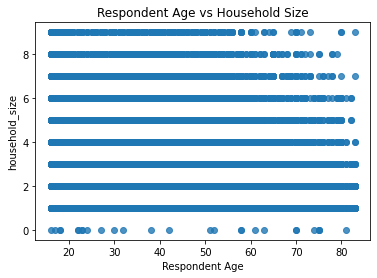

In [ ]:
# Scatter Plot
sns.regplot(x=fin_outliers['Respondent Age'], y=fin_outliers['household_size'], fit_reg=False)
plt.title('Respondent Age vs Household Size')

# Shows no correlation

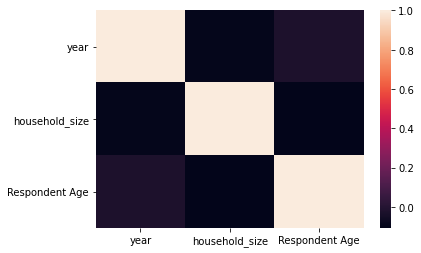

In [ ]:
# Correlation in the Numeric Variables
sns.heatmap(fin_outliers.corr())

Z_test

In [ ]:
from scipy import stats

stats.zscore(fin_outliers['household_size'])

array([-0.2787056 ,  0.68260346,  0.68260346, ..., -0.75936013,
        0.68260346,  1.64391252])

## MultiVariate Analysis

### PCA

In [ ]:
# Transform categorical variables to numeric
financial = pd.get_dummies(fin_outliers, columns=['Type of Location','Cell Phone Access','gender_of_respondent','country'])
financial.head()

,year,Has a Bank account,household_size,Respondent Age,The relathip with head,marital_status,Level of Educuation,Type of Job,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,Yes,3.0,24.0,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,1,1,0,1,0,0,0
1,2018,No,5.0,70.0,Head of Household,Widowed,No formal education,Government Dependent,1,0,1,0,1,0,1,0,0,0
2,2018,Yes,5.0,26.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,1,0,1,0,1,1,0,0,0
3,2018,No,5.0,34.0,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,1,1,0,1,0,0,0
4,2018,No,8.0,26.0,Child,Single/Never Married,Primary education,Informally employed,0,1,1,0,0,1,1,0,0,0


In [ ]:
financial2 = financial.drop(['The relathip with head','marital_status','Level of Educuation','Type of Job','year'], axis=1 )

In [ ]:
financial2.head()

,Has a Bank account,household_size,Respondent Age,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,Yes,3.0,24.0,1,0,0,1,1,0,1,0,0,0
1,No,5.0,70.0,1,0,1,0,1,0,1,0,0,0
2,Yes,5.0,26.0,0,1,0,1,0,1,1,0,0,0
3,No,5.0,34.0,1,0,0,1,1,0,1,0,0,0
4,No,8.0,26.0,0,1,1,0,0,1,1,0,0,0


In [ ]:
# Preprocessing
X_pca = financial2.drop('Has a Bank account',1)
y_pca = financial2['Has a Bank account']

In [ ]:
#Split the Dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_pca,y_pca, test_size=0.2,random_state=0)

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying the PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Explained Variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.25267275, 0.18006905])

In [ ]:
#Train and make predicitions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 3, random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


In [ ]:
# Check on a Performance

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy is ',accuracy_score(y_test,y_pred))

[[3896    0]
 [ 649    0]]
Accuracy is  0.8572057205720572


### Factor Analysis

In [ ]:
map_loc = {
    'Rural':0,
    'Urban':1
}

map_gender = {
    'Male':0,
    'Female':1
}

map_phone = {
    'Yes':0,
    'No':1
}

map_country ={
    'Kenya':1,
    'Uganda':2,
    'Tanzania':3,
    'Rwanda':4
}

fin_outliers['Type of Location'] = fin_outliers['Type of Location'].map(map_loc)
fin_outliers['gender_of_respondent'] = fin_outliers['gender_of_respondent'].map(map_gender)
fin_outliers['Cell Phone Access'] = fin_outliers['Cell Phone Access'].map(map_phone)
fin_outliers['country'] = fin_outliers['country'].map(map_country)

In [ ]:
fin_outliers.head(2)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,1,2018,Yes,0,0,3.0,24.0,1,Spouse,Married/Living together,Secondary education,Self employed
1,1,2018,No,0,1,5.0,70.0,1,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
# Drop Irrelevant Data
financial_fa = fin_outliers.drop(['Has a Bank account','year','The relathip with head','marital_status','Level of Educuation','Type of Job'], axis=1)

In [ ]:
financial_fa.head()

,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,1,0,0,3.0,24.0,1
1,1,0,1,5.0,70.0,1
2,1,1,0,5.0,26.0,0
3,1,0,0,5.0,34.0,1
4,1,1,1,8.0,26.0,0


In [ ]:
# Install a Factor Analyzer
pip install factor_analyzer==0.2.3

In [ ]:
# Bartlett's Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(financial_fa)
chi_square_value,p_value

# The p_value is 0 then its statistically significant

(3810.3003634634024, 0.0)

In [ ]:
# Kasier Meyer Olkin, KMO
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model = calculate_kmo(financial_fa)
kmo_model

# the KMO is less than 0.6 thus the dataset is not suitable for Factor Analysis

0.5074295960013875

### Linear Discriminant

In [ ]:
fin_outliers.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,1,2018,Yes,0,0,3.0,24.0,1,Spouse,Married/Living together,Secondary education,Self employed
1,1,2018,No,0,1,5.0,70.0,1,Head of Household,Widowed,No formal education,Government Dependent
2,1,2018,Yes,1,0,5.0,26.0,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,1,2018,No,0,0,5.0,34.0,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,1,2018,No,1,1,8.0,26.0,0,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Preprocessing
X_ld = fin_outliers.drop(['The relathip with head','marital_status','Level of Educuation','Type of Job','year','Has a Bank account'],axis=1)
y_ld = fin_outliers['Has a Bank account']

In [ ]:
#Split Dataset
X_ld_train,X_ld_test,y_ld_train,y_ld_test = train_test_split(X_ld,y_ld, test_size=0.2, random_state=0)


In [ ]:
#Feature scaling 

sc = StandardScaler()
X_ld_train = sc.fit_transform(X_ld_train)
X_ld_test = sc.transform(X_ld_test)

In [ ]:
# Perform a Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ld = LDA(n_components = 1)
X_ld_train = ld.fit_transform(X_ld_train,y_ld_train)
X_ld_test = ld.transform(X_ld_test)

In [ ]:
# Train and Make Predictions
classifier = RandomForestClassifier(max_depth=3, random_state=0)
classifier.fit(X_ld_train,y_ld_train)

y_pred = classifier.predict(X_ld_test)

In [ ]:
# Evaluating Performance

cm = confusion_matrix(y_ld_test,y_pred)
print(cm)
print('Accuracy is ',accuracy_score(y_ld_test,y_pred))

[[3830   66]
 [ 578   71]]
Accuracy is  0.8583058305830583


## Challenging Solution

From the prediction we have 85% Accuracy.
A suggestion is to Apply another Prediction Algorithms to improve on Accuracy 